Разбор дата сета - HOUSING

In [5]:
HOUSING_PATH = "../data/housing.csv"

In [6]:
import pandas as pd

housing = pd.read_csv(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# категориальные переменные
housing["ocean_proximity"].value_counts()

#housing["ocean_proximity"].value_counts(normalize = True)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c766fd7f0>,
      dtype=object)

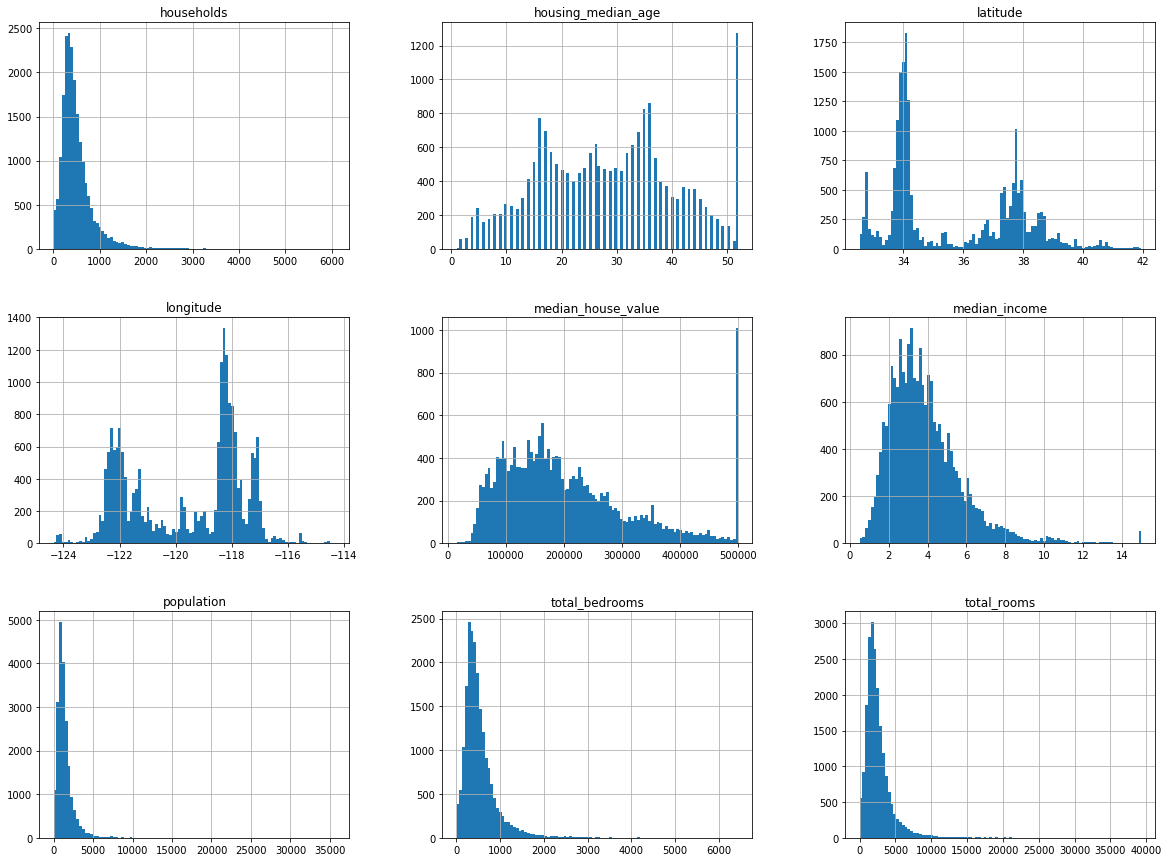

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=100, figsize=(20,15))

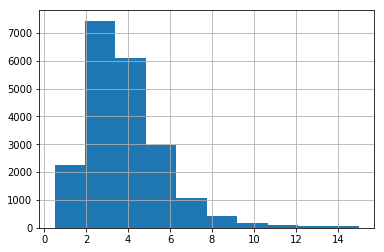

In [11]:
housing.median_income.hist()

In [12]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [38]:
import numpy as np
np.random.seed(42)

# Обработка нулевых/пропущенных значений

В реальных данных часто встречаются пропущенные значения, важно уметь их правильно обрабатывать.
Как это не стоит делать в большинстве случаев:
    1. Удалить столбец(переменную, фичу, параметр), содержащий нулевое значение (очень большая потеря информации)
    2. Удалить строки, в которых атрибут равен нулевому значению (средняя или большая потеря информации)
    
=> Надо заменять нулевые ячейки на какие-то значения, но на какие именно?

Можно встретить в литературе/статьях:
    1. Замена на среднее значение, медиану, моду
    2. Indicator Method - замена пропущенных значений нулями и создание новой переменной индикатора (где она принимает значение 1 при наличение пропуска и 0 в остальных случаях)
    3. Повторение результата последнего наблюдения
    4. Восстановление пропуском на основе регрессионных моделей

In [13]:
housing.total_bedrooms.value_counts().iloc[:10]

280.0    55
331.0    51
345.0    50
393.0    49
343.0    49
348.0    48
328.0    48
394.0    48
272.0    47
309.0    47
Name: total_bedrooms, dtype: int64

In [14]:
housing.total_bedrooms2 = housing.total_bedrooms.fillna(value = 45).value_counts(dropna = False).iloc[:10]

/home/truename/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [15]:
housing.total_bedrooms2.mean()

65.7

In [16]:
housing.total_bedrooms.median()

435.0

In [17]:
housing[['ocean_proximity', 'total_bedrooms']].groupby('ocean_proximity').mean()

,total_bedrooms
ocean_proximity,
<1H OCEAN,546.539185
INLAND,533.881619
ISLAND,420.400000
NEAR BAY,514.182819
NEAR OCEAN,538.615677


# Категорийные атрибуты

Пример категорийного атрибута - 'ocean_proximity'.
В зависимости от типа данных, такие атрибуты преобразуются либо в порядковые значения (нам важно указать порядок), либо в бинарные параметры.

Например, атрибут "расстояние" со значениеми ['близко', 'средне', 'далеко'] можно преобразовать в атрибут со значениями [0,2,3], либо в три новых атрибута "расстояние_близко", "расстояние_среднее", "расстояние_далеко" со значениями 1/0.


In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray() 

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [20]:
pd.get_dummies(housing["ocean_proximity"]).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


# Масштабирование данных 

Зачем масштабировать данные?
Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

In [21]:
from IPython.display import Image

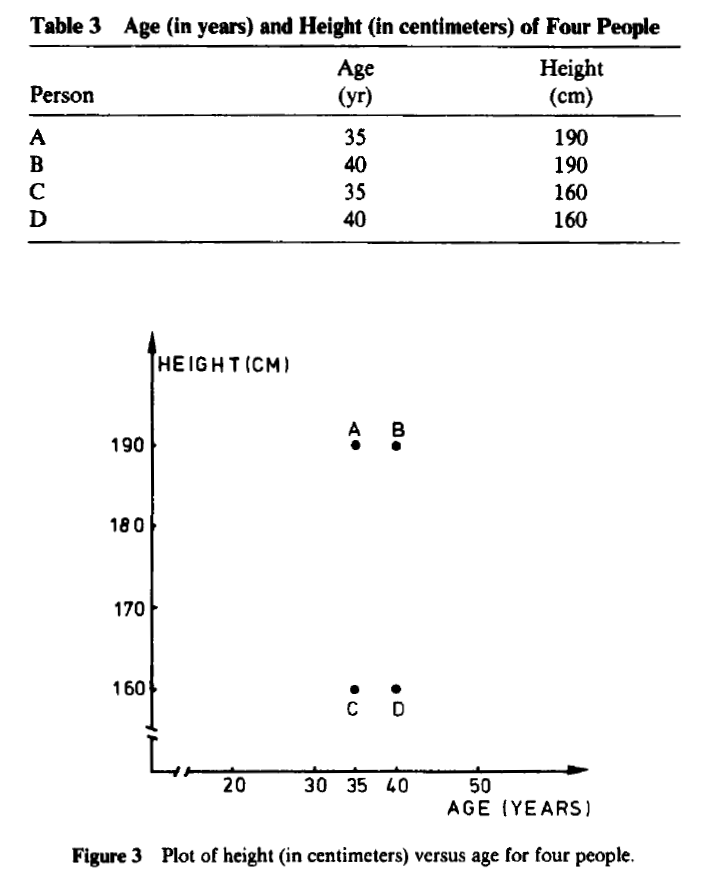

In [23]:
Image('../img/Ppu5Y.png')

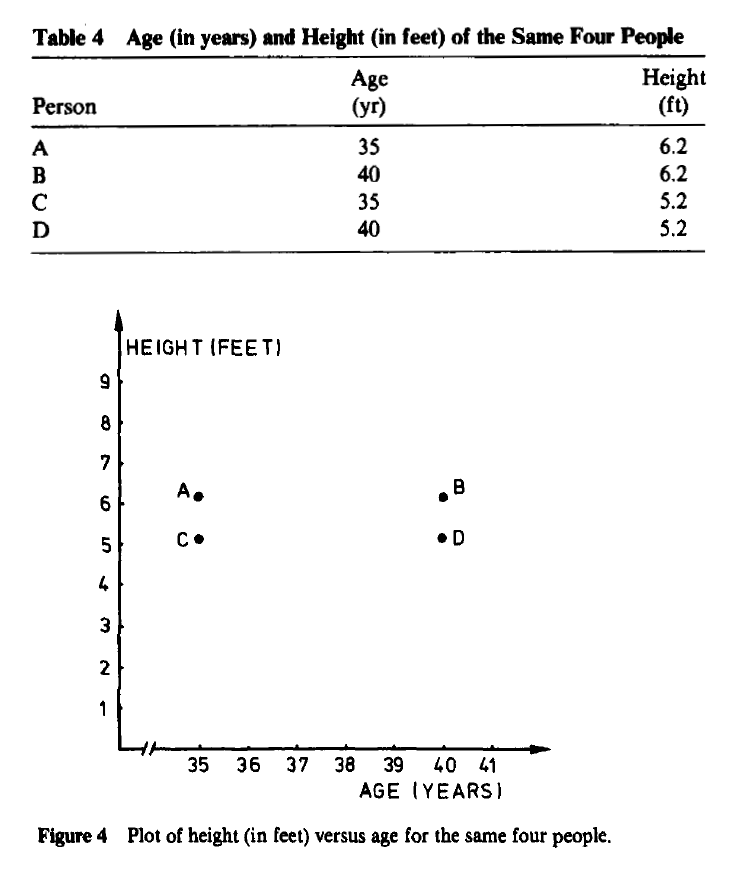

In [24]:
Image('../img/zW6rI.png')

..

## Визуализация

In [25]:
housing = strat_train_set.copy()

NameError: name 'strat_train_set' is not defined

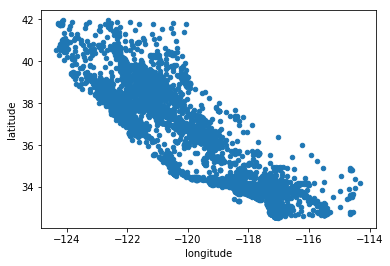

In [109]:
_ = housing.plot(kind="scatter", x="longitude", y="latitude")

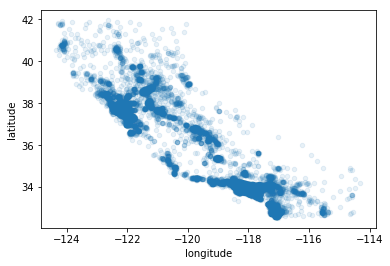

In [17]:
_ = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

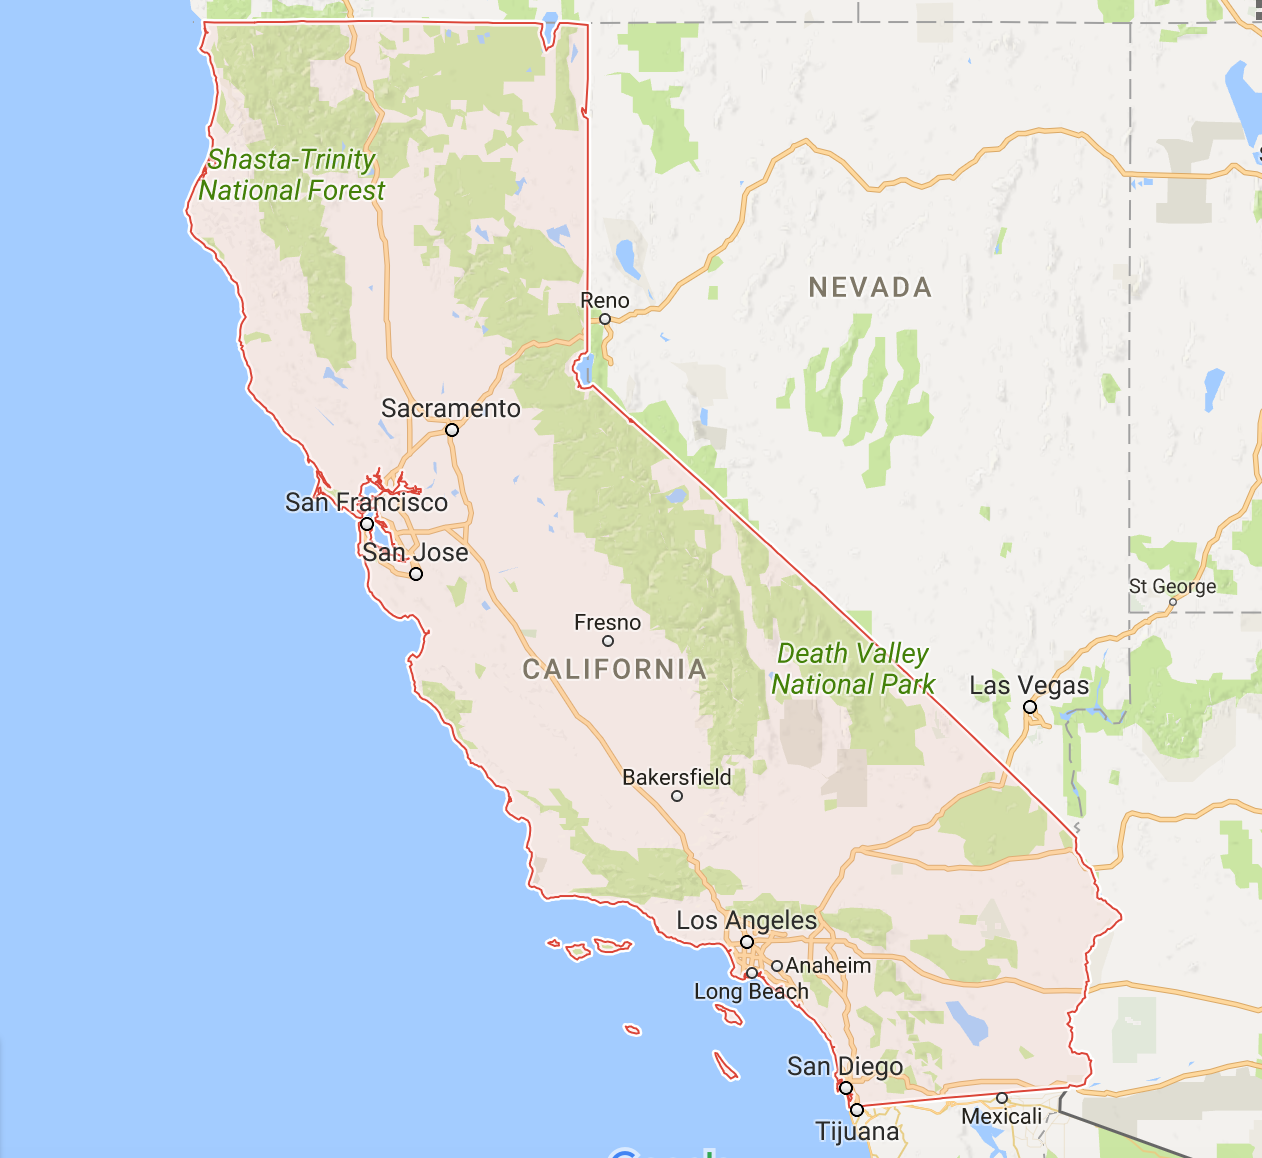

In [86]:
Image('../data/calfornia.png')

In [26]:
import matplotlib.pyplot as plt

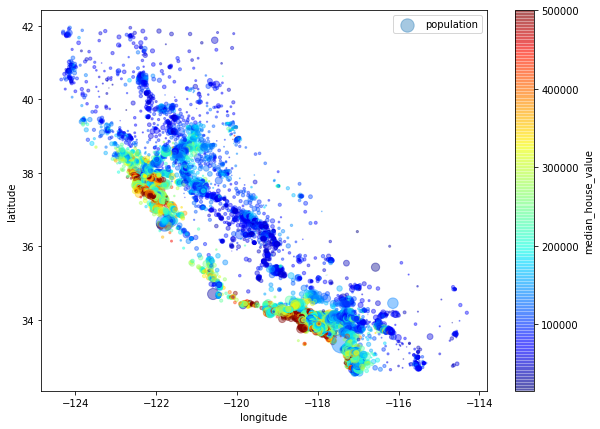

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
_ = plt.legend()

In [28]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [29]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


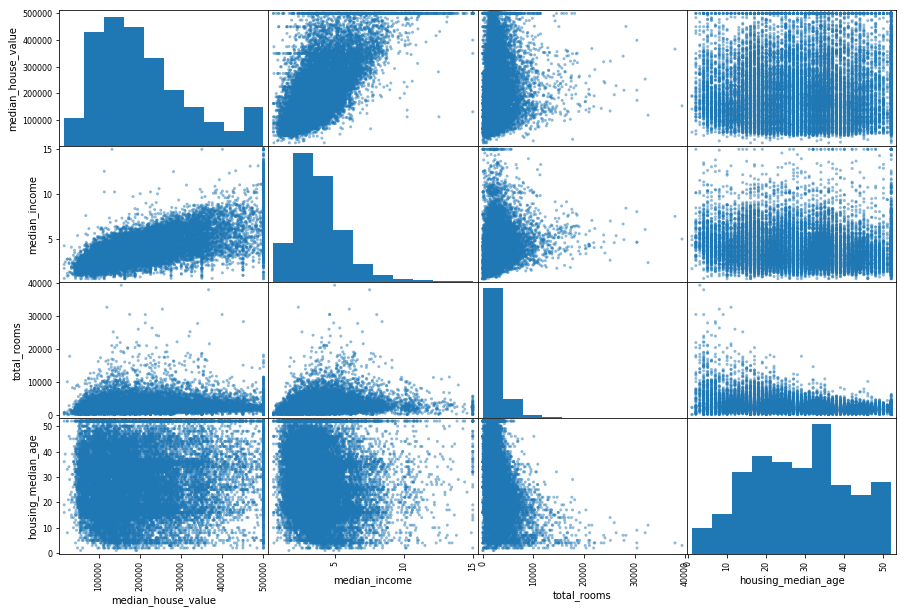

In [30]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
_ = scatter_matrix(housing[attributes], figsize=(15, 10))

[0, 16, 0, 550000]

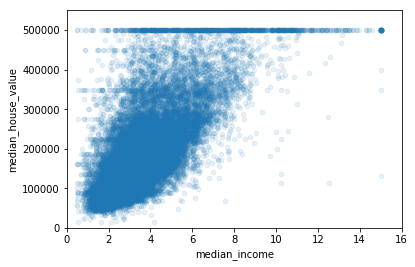

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [32]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [33]:
housing.population_per_household.describe()

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: population_per_household, dtype: float64

In [34]:
housing["population_per_household"].describe(percentiles=[0.999])

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
50%          2.818116
99.9%       13.630443
max       1243.333333
Name: population_per_household, dtype: float64

In [35]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### Создание из непрерывной - категориальной фичи

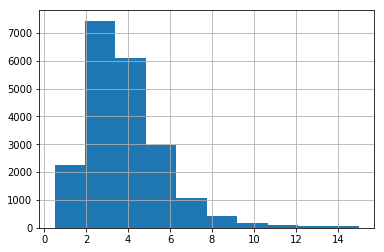

In [36]:
housing["median_income"].hist()

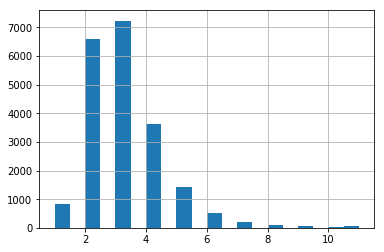

In [39]:
#деление на 1.5 и округление до целой части
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].hist(bins=20)

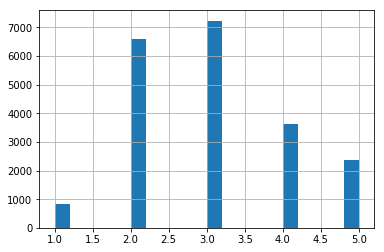

In [40]:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist(bins=20)

# Домашняя работа

1. Масштабирование:
    а. Нормализовать признак - median_income
    б. Привести признак - population к масштабу от 0 до 100
    
2. Заполнение пропусков:
    а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity
    Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории
    
3. Категорийные атрибуты:
    а. Посчитать среднее кол-во комнат в строке (total_rooms/households)
    б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)